In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Before running

Run `3_aggregate_results.py` and `4_download_checkpoints.py` to generate or download metrics and checkpoints. See README for more info.

In [3]:
results = pd.read_csv("results/norman_ood_results.csv")

Selecting `n_layers` for downstream analysis using validation IWELBO when trained with all combos. We observe that the models generally performed very similarly across different number of layers, so we will use the simplest models (1 hidden layer on encoder / decoder) for analyses.

In [4]:
curr = results[(results["mean_field_encoder"] != True)]
for model in results["model"].unique():
    print(model)
    curr = results[(results["model"] == model) & (results["mean_field_encoder"] != True)]
    curr = curr[curr["frac_combinations_train"] == 1]

    curr = curr.groupby(["encode_unique", "mean_field_encoder", "model", "guide", "n_layers", "frac_combinations_train", "mask_prior_prob", "mask_beta_concentration_2", "n_latent"], dropna=False)\
                    [["val/IWELBO"]]\
                    .agg(["mean", "std", "count"])
    display(curr.sort_values(("val/IWELBO", "mean"), ascending=False))

sams_vae_mean_field


val/IWELBO  \
                                                                                                                                                                             mean   
encode_unique mean_field_encoder model               guide                       n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                     0.01            NaN                       200      -1789.094751   
                                                                                 4        1.0                     0.01            NaN                       200      -1789.098340   
                                                                                 2        1.0                     0.01            NaN                       200      -1789.190991   
True          False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                     0.01            NaN                       200      -1789.263770   
                                                                                 4        1.0                     0.01            NaN                       200      -1789.453613   
                                                                                 2        1.0                     0.01            NaN                       200      -1789.660132   

                                                                                                                                                                                \
                                                                                                                                                                           std   
encode_unique mean_field_encoder model               guide                       n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                     0.01            NaN                       200       1.829761   
                                                                                 4        1.0                     0.01            NaN                       200       1.854078   
                                                                                 2        1.0                     0.01            NaN                       200       1.742281   
True          False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                     0.01            NaN                       200       1.879567   
                                                                                 4        1.0                     0.01            NaN                       200       1.772019   
                                                                                 2        1.0                     0.01            NaN                       200       1.890635   

                                                                                                                                                                            
                                                                                                                                                                     count  
encode_unique mean_field_encoder model               guide                       n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                     0.01            NaN                       200          5  
                                                                                 4        1.0                     0.01            NaN                       200          5  
                                                                     

sams_vae_correlated


val/IWELBO  \
                                                                                                                                                                              mean   
encode_unique mean_field_encoder model               guide                        n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                     0.01            NaN                       200      -1788.802490   
                                                                                  2        1.0                     0.01            NaN                       200      -1789.144116   
True          False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 2        1.0                     0.01            NaN                       200      -1789.145630   
                                                                                  1        1.0                     0.01            NaN                       200      -1789.237256   
                                                                                  4        1.0                     0.01            NaN                       200      -1789.882983   
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 4        1.0                     0.01            NaN                       200      -1789.979517   

                                                                                                                                                                                 \
                                                                                                                                                                            std   
encode_unique mean_field_encoder model               guide                        n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                     0.01            NaN                       200       1.850976   
                                                                                  2        1.0                     0.01            NaN                       200       1.727358   
True          False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 2        1.0                     0.01            NaN                       200       1.875140   
                                                                                  1        1.0                     0.01            NaN                       200       1.883814   
                                                                                  4        1.0                     0.01            NaN                       200       1.965535   
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 4        1.0                     0.01            NaN                       200       1.987837   

                                                                                                                                                                             
                                                                                                                                                                      count  
encode_unique mean_field_encoder model               guide                        n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                     0.01            NaN                       200          5  
                                                                                  2        1.0                     0.01            NaN                       200          5  
True          False              sams_vae_corre

cpa_vae


val/IWELBO  \
                                                                                                                                                       mean   
encode_unique mean_field_encoder model   guide             n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
True          False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN             NaN                       200      -1788.934961   
                                                           1        1.0                     NaN             NaN                       200      -1788.962866   
False         False              cpa_vae CPAVAENormalGuide 1        1.0                     NaN             NaN                       200      -1789.151538   
                                                           2        1.0                     NaN             NaN                       200      -1789.166724   
True          False              cpa_vae CPAVAENormalGuide 2        1.0                     NaN             NaN                       200      -1789.184839   
False         False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN             NaN                       200      -1789.212012   

                                                                                                                                                          \
                                                                                                                                                     std   
encode_unique mean_field_encoder model   guide             n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent             
True          False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN             NaN                       200       1.912729   
                                                           1        1.0                     NaN             NaN                       200       1.825808   
False         False              cpa_vae CPAVAENormalGuide 1        1.0                     NaN             NaN                       200       1.855718   
                                                           2        1.0                     NaN             NaN                       200       1.838635   
True          False              cpa_vae CPAVAENormalGuide 2        1.0                     NaN             NaN                       200       1.931327   
False         False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN             NaN                       200       1.740699   

                                                                                                                                                      
                                                                                                                                               count  
encode_unique mean_field_encoder model   guide             n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent        
True          False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN             NaN                       200          5  
                                                           1        1.0                     NaN             NaN                       200          5  
False         False              cpa_vae CPAVAENormalGuide 1        1.0                     NaN             NaN                       200          5  
                                                           2        1.0                     NaN             NaN                       200          5  
True          False              cpa_vae CPAVAENormalGuide 2        1.0                     NaN             NaN                       200          5  
False         False              cpa_vae CPAVAENormalGuide 4        1.0                     NaN     

svae+


val/IWELBO  \
                                                                                                                                                 mean   
encode_unique mean_field_encoder model guide         n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
True          NaN                svae+ SVAEPlusGuide 2        1.0                     NaN             2.0                       200      -1791.334424   
                                                     1        1.0                     NaN             2.0                       200      -1791.378052   
                                                     4        1.0                     NaN             2.0                       200      -1791.782422   

                                                                                                                                                    \
                                                                                                                                               std   
encode_unique mean_field_encoder model guide         n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent             
True          NaN                svae+ SVAEPlusGuide 2        1.0                     NaN             2.0                       200       1.853857   
                                                     1        1.0                     NaN             2.0                       200       1.852502   
                                                     4        1.0                     NaN             2.0                       200       1.950763   

                                                                                                                                                
                                                                                                                                         count  
encode_unique mean_field_encoder model guide         n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent        
True          NaN                svae+ SVAEPlusGuide 2        1.0                     NaN             2.0                       200          5  
                                                     1        1.0                     NaN             2.0                       200          5  
                                                     4        1.0                     NaN             2.0                       200          5

conditional_vae


val/IWELBO  \
                                                                                                                                                                 mean   
encode_unique mean_field_encoder model           guide               n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                     NaN             NaN                       200      -1790.361548   
                                                                     2        1.0                     NaN             NaN                       200      -1790.632690   
                                                                     4        1.0                     NaN             NaN                       200      -1791.098120   
True          NaN                conditional_vae ConditionalVAEGuide 2        1.0                     NaN             NaN                       200      -1791.741577   
                                                                     1        1.0                     NaN             NaN                       200      -1791.840039   
                                                                     4        1.0                     NaN             NaN                       200      -1792.395874   

                                                                                                                                                                    \
                                                                                                                                                               std   
encode_unique mean_field_encoder model           guide               n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                     NaN             NaN                       200       1.826410   
                                                                     2        1.0                     NaN             NaN                       200       1.729703   
                                                                     4        1.0                     NaN             NaN                       200       1.997160   
True          NaN                conditional_vae ConditionalVAEGuide 2        1.0                     NaN             NaN                       200       1.702535   
                                                                     1        1.0                     NaN             NaN                       200       1.813639   
                                                                     4        1.0                     NaN             NaN                       200       1.768193   

                                                                                                                                                                
                                                                                                                                                         count  
encode_unique mean_field_encoder model           guide               n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                     NaN             NaN                       200          5  
                                                                     2        1.0                     NaN             NaN                       200          5  
                                                                     4        1.0                     NaN             NaN                       200          5  
True          NaN                conditional_vae ConditionalVAEGuide 2        1.0                     NaN             NaN                       200          5  
           

### Tables

Because we are assessing predictions on held out combinations across different splits, there is high variance in the test IWELBO for the same model / setting but with different held out combinations. To help reduce this variation, we examine the IWELBO relative to SAMS-VAE correlated with 0 combinations for a given split.

In [5]:
def get_baseline_results(results):
    # get IWELBO values for SAMS-VAE correlated with no train combinations for each split seed
    df = results[results["model"] == "sams_vae_correlated"]
    df = df[df["mean_field_encoder"] == False]
    df = df[df["encode_unique"] == False]
    df = df[df["frac_combinations_train"] == 0]
    df = df[["split_seed", "n_layers", "val/IWELBO", "test/IWELBO"]]
    df = df.rename(columns={"val/IWELBO": "val/IWELBO_baseline", "test/IWELBO": "test/IWELBO_baseline"})
    return df

In [6]:
baseline_df = get_baseline_results(results)

In [7]:
# add relative metrics
results = results.merge(baseline_df, on=["split_seed", "n_layers"])
results["val/IWELBO_relative"] = results["val/IWELBO"] - results["val/IWELBO_baseline"]
results["test/IWELBO_relative"] = results["test/IWELBO"] - results["test/IWELBO_baseline"]

In [93]:
# aggregate results into table
curr = results[(results["n_layers"] == 1) & (results["mean_field_encoder"] != True)]
aggregated_results = curr.groupby(["encode_unique", "mean_field_encoder", "model", "guide", "n_layers", "frac_combinations_train", "mask_prior_prob", "mask_beta_concentration_2", "n_latent"], dropna=False)\
                [["val/IWELBO", "val/IWELBO_relative", "test/IWELBO", "test/IWELBO_relative", "ATE_pearsonr-test", "ATE_pearsonr_top20-test"]]\
                .agg(["mean", "std", "count"])

In [94]:
aggregated_results

val/IWELBO  \
                                                                                                                                                                              mean   
encode_unique mean_field_encoder model               guide                        n_layers frac_combinations_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              cpa_vae             CPAVAENormalGuide            1        0.00                    NaN             NaN                       200      -1798.584131   
                                                                                           0.25                    NaN             NaN                       200      -1796.370386   
                                                                                           0.50                    NaN             NaN                       200      -1793.881592   
                                                                                           0.75                    NaN             NaN                       200      -1791.642725   
                                                                                           1.00                    NaN             NaN                       200      -1789.151538   
                                 sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        0.00                    0.01            NaN                       200      -1799.467139   
                                                                                           0.25                    0.01            NaN                       200      -1796.339624   
                                                                                           0.50                    0.01            NaN                       200      -1793.616602   
                                                                                           0.75                    0.01            NaN                       200      -1791.472729   
                                                                                           1.00                    0.01            NaN                       200      -1788.802490   
                                 sams_vae_mean_field SAMSVAEMeanFieldNormalGuide  1        0.00                    0.01            NaN                       200      -1798.737598   
                                                                                           0.25                    0.01            NaN                       200      -1796.395898   
                                                                                           0.50                    0.01            NaN                       200      -1793.757251   
                                                                                           0.75                    0.01            NaN                       200      -1791.511401   
                                                                                           1.00                    0.01            NaN                       200      -1789.094751   
              NaN                conditional_vae     ConditionalVAEGuide          1        0.00                    NaN             NaN                       200      -1800.268066   
                                                                                           0.25                    NaN             NaN                       200      -1797.840454   
                                                                                           0.50                    NaN             NaN                       200      -1795.162769   
                                                                                           0.75                    NaN             NaN                       200      -1792.843506   
                                                                                           1.00                    NaN             NaN                       200    

In [149]:
def plot_aggregated_results(aggregated_results, col, filtered_models=True, show_standard_deviation=True):
    df = aggregated_results.reset_index()
    for i in range(0, df.shape[0], 5):
        curr = df.iloc[i:i+5].sort_values("frac_combinations_train")
        model_key = curr["model"].iloc[0]
        if filtered_models:
            if curr.iloc[0]["encode_unique"].item() and curr["model"].iloc[0] != "svae+":
                continue
        else:
            model_key += " U"
        x = curr['frac_combinations_train']
        y = curr[col]['mean']
        y_std = curr[col]['std']
        plt.plot(x, y, label=model_key)
        if show_standard_deviation:
            plt.fill_between(x=x, y1=y-y_std, y2=y+y_std, alpha=0.5)
        plt.xticks([0, 0.25, 0.5, 0.75, 1])
    plt.legend()
    return df

def plot_aggregated_results_bar(aggregated_results, col):
    df = aggregated_results.reset_index()
    df = df[(df["encode_unique"] == False) | (df["model"] == "svae+")]
    model_order = {
        "sams_vae_correlated": 0, 
        "cpa_vae": 1, 
        "conditional_vae": 2,
        "svae+": 3, 
    }
    display_names = {
        "sams_vae_correlated": "SAMS-VAE",
        "cpa_vae": "CPA-VAE",
        "conditional_vae": "Conditional VAE",
        "svae+": "SVAE+"
    }
    df = df[df["model"].isin(model_order.keys())]
    
    bar_width = 1 / (len(model_order) + 2)
    xtick_pos = bar_width * len(model_order) / 2 + np.arange(df["frac_combinations_train"].nunique())
    xtick_labels = df["frac_combinations_train"].drop_duplicates().sort_values()
    
    
    fig, ax = plt.subplots()
    
    x = np.arange(df["frac_combinations_train"].nunique())
    for model_key in df["model"].unique():
        curr = df[df["model"] == model_key].sort_values("frac_combinations_train")
        offset = bar_width * model_order[model_key]
        ax.bar(x + offset, curr[(col, "mean")], bar_width, yerr=curr[(col, "std")], linewidth=0.5, edgecolor="k", label=model_key)
    plt.xticks(xtick_pos, xtick_labels)

    ax.axhline(0, 0, 1, color="k", linewidth=0.75)
    
    handles, labels = ax.get_legend_handles_labels()
    handles_dict = {label: handle for label, handle in zip(labels, handles)}
    model_keys = list(model_order.keys())
    plt.legend([handles_dict[model_key] for model_key in model_keys], [display_names[model_key] for model_key in model_keys], loc='center left', bbox_to_anchor=(1, 0.5))
    
    xlabel_dict = {
        "test/IWELBO_relative": "Relative IWELBO\n(Held Out Combinations)",
        "test/IWELBO": "IWELBO\n(Held Out Combinations)",
        "ATE_pearsonr-test": "Predicted Average Treatment Effect Correlation\n(Held Out Combinations)",
    }
    
    plt.xlabel("Fraction Combinations in Training Set")
    plt.ylabel(xlabel_dict[col])

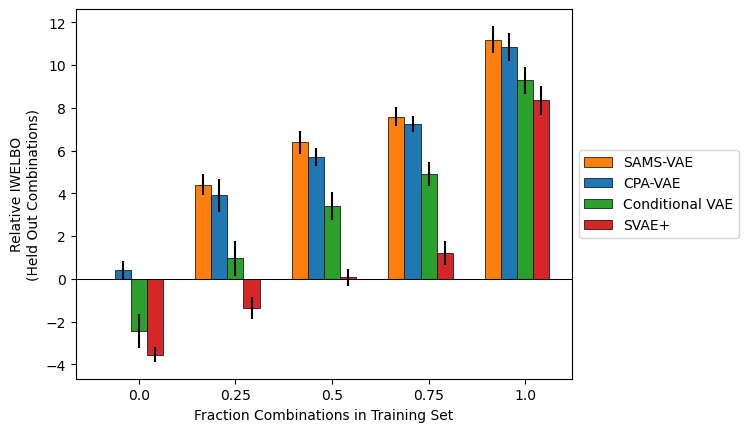

In [150]:
plot_aggregated_results_bar(aggregated_results, "test/IWELBO_relative")

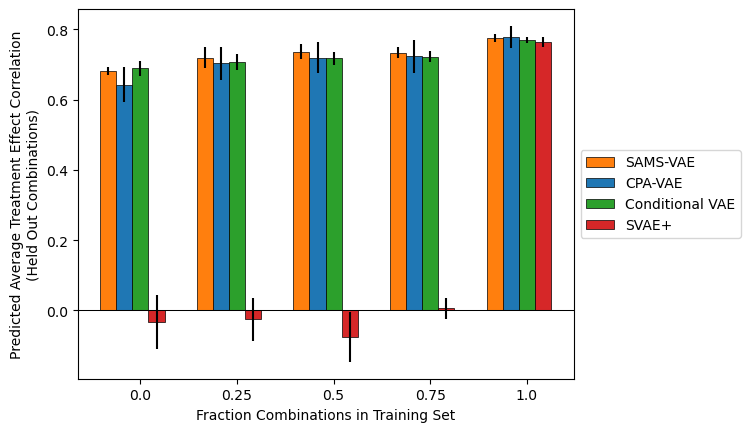

In [151]:
plot_aggregated_results_bar(aggregated_results, "ATE_pearsonr-test")

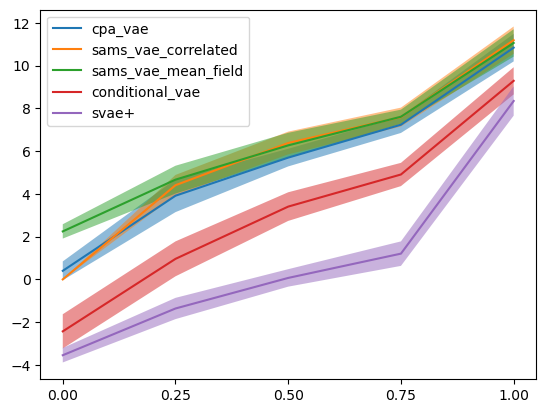

In [153]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO_relative")

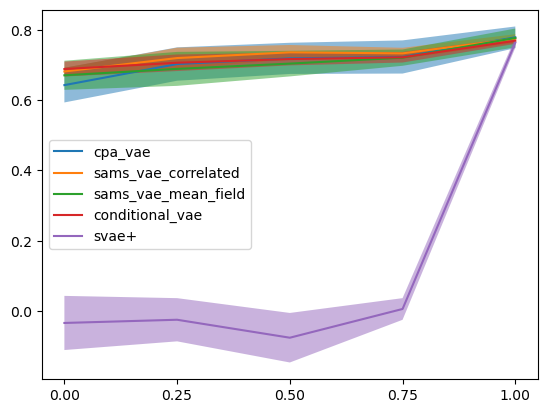

In [154]:
_ = plot_aggregated_results(aggregated_results, "ATE_pearsonr-test")

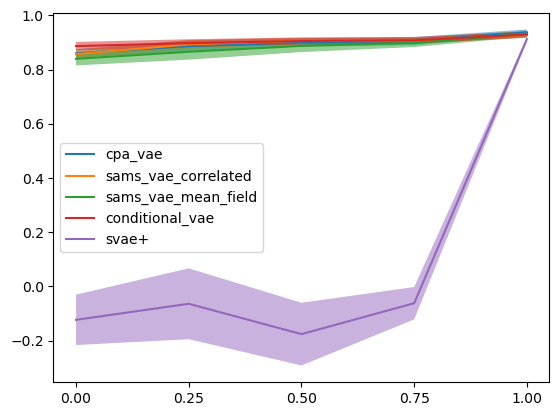

In [155]:
_ = plot_aggregated_results(aggregated_results, "ATE_pearsonr_top20-test")

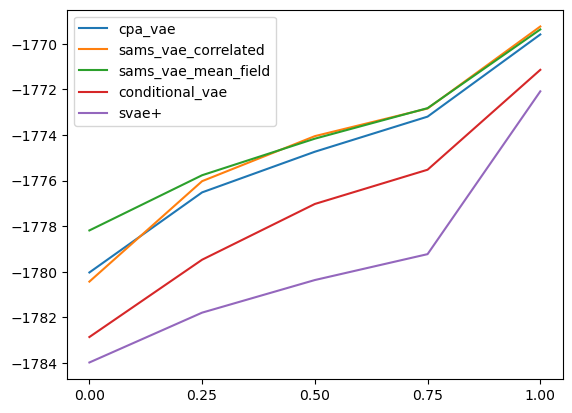

In [156]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO", show_standard_deviation=False)

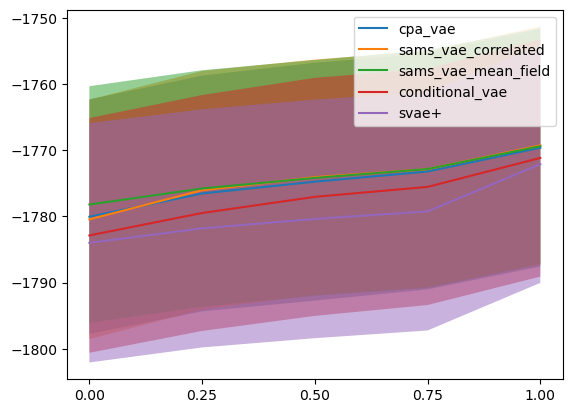

In [157]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO")